In [155]:
import pandas as pd
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt

In [154]:
#datas
iran=gpd.read_file('IRN_adm1.shp')
iran_water=gpd.read_file('iran_water.shp')
caspaian = gpd.read_file('worldglwd1.shp')
iho= gpd.read_file('iho.shp')
eez_iho= gpd.read_file('eez_iho.shp')

<AxesSubplot:>

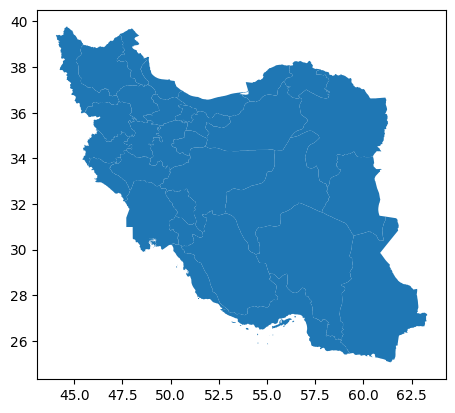

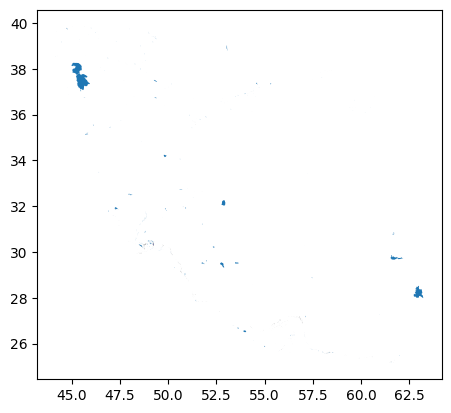

In [153]:
iran.plot()
iran_water.plot()

In [152]:
iran.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,107,IRN,Iran,1,Alborz,IR.AL,0,NaN,Ostan,Province,استان البرز,NaN,"POLYGON ((50.55453 36.34840, 50.57835 36.33935..."
1,107,IRN,Iran,2,Ardebil,IR.AR,0,NaN,Ostan,Province,NaN,Ardabil,"POLYGON ((48.03973 39.65592, 48.04565 39.65158..."
2,107,IRN,Iran,3,Bushehr,IR.BS,0,NaN,Ostan,Province,NaN,Banader va Jazayer-e Khalij-e Fars|Bushire|Per...,"MULTIPOLYGON (((52.67042 27.45958, 52.67042 27..."
3,107,IRN,Iran,4,Chahar Mahall and Bakhtiari,IR.CM,0,NaN,Ostan,Province,NaN,Bakhtiari|Chaharmahal va Bakhtiyari|Charmahal-...,"POLYGON ((50.82116 32.66864, 50.82166 32.65881..."
4,107,IRN,Iran,5,East Azarbaijan,IR.EA,0,NaN,Ostan,Province,NaN,Azarbayjan-e Khavari|Azarbaijan-e Sharghi|Azar...,"POLYGON ((47.48034 39.13348, 47.49612 39.11452..."


In [151]:
iran_water.head()

,NATURAL,NAME,geometry
0,water,Tuz GÃ¶lÃ¼,"POLYGON ((44.19111 38.54403, 44.19010 38.54288..."
1,water,NaN,"POLYGON ((44.24179 39.63191, 44.24167 39.63191..."
2,water,NaN,"POLYGON ((44.24245 39.63281, 44.24234 39.63285..."
3,water,ÃaÃ§an GÃ¶lÃ¼,"POLYGON ((44.28799 38.55894, 44.28687 38.55839..."
4,water,NaN,"POLYGON ((44.46458 39.16370, 44.46312 39.16407..."


In [150]:
#selected parts of datas
WestAzarbaijan=iran[iran['NAME_1']=='West Azarbaijan']
u1=iran_water.iloc[29,2]
u2=iran_water.iloc[31,2]
p1 = gpd.GeoSeries(u1)
p2 = gpd.GeoSeries(u2)


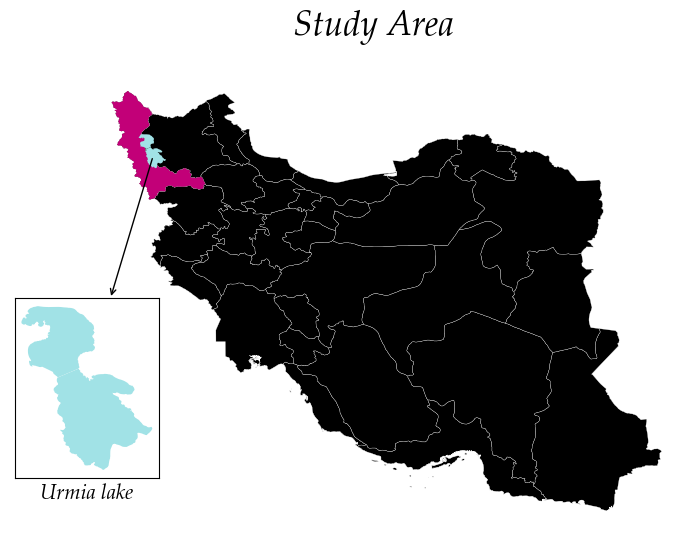

In [149]:
#adding another ax for focusing on lake urmia
fig , ax1= plt.subplots(figsize=(11,6))
ax2=fig.add_axes([0.04, 0.2, 0.4, 0.3])

iran.plot(ax=ax1,color='black',edgecolor='white', linewidth=0.2)

#coloring the province and lake urmia in ax1
WestAzarbaijan.plot(ax=ax1,color='#C20078')
p1.plot(ax=ax1,color='#A1E2E6',linewidth=0)
p2.plot(ax=ax1,color='#A1E2E6',linewidth=0)

#plotting urmia lake in ax2
p1.plot(ax=ax2,color='#A1E2E6',linewidth=0)
p2.plot(ax=ax2,color='#A1E2E6',linewidth=0)

#annotating 
ax1.annotate("",
            xy=(44, 32.5), xycoords='data',
            xytext=(45.5,37.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

#texts
fig.suptitle('Study Area',fontsize=25,fontstyle='oblique',fontname='Palatino Linotype')
ax2.set_xlabel('Urmia lake',fontsize=15,fontstyle='oblique',fontname='Palatino Linotype')

#I don't like axis for ax1
ax1.axis('off')

#I just wanted a square
ax2.set_yticks([])
ax2.set_xticks([])

#for saving the plot as a png
fig.savefig('Study Area.png',dpi=500)